# CPA01

- author: Huijie Liu
- huijieliu@brandeis.edu

### a. Description on the dataset

1. describe the dataset:
- This is a dataset contains a large number of covid data all over the world.
2. the URL of the dataset:
- https://github.com/owid/covid-19-data/tree/master/public/data
- just click the CSV link to download the dataset
3. give at least two interesting questions you have about the data
- What is the relationship between total vacination number per hundred person and new death number?
- Up till now, which month has the highest number of new cases for the whole world?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### b. load the data into a pandas dataframe

In [2]:
data = pd.read_csv('data/owid-covid-data.csv')

In [14]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184042,ZWE,Africa,Zimbabwe,2022-05-01,247911.0,36.0,55.286,5469.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-05
184043,ZWE,Africa,Zimbabwe,2022-05-02,247935.0,24.0,48.143,5470.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-05
184044,ZWE,Africa,Zimbabwe,2022-05-03,247990.0,55.0,46.143,5470.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-05
184045,ZWE,Africa,Zimbabwe,2022-05-04,248050.0,60.0,45.857,5471.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-05


### c. use pd.describe() to get a rough overview of the data

In [3]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.772010e+05,1.770230e+05,1.758540e+05,1.589110e+05,158917.000000,157760.000000,176382.000000,176204.000000,175040.000000,158105.000000,...,115034.000000,113457.000000,74722.000000,134475.000000,172076.000000,148140.000000,6.359000e+03,6359.000000,6359.000000,6359.000000
mean,3.053704e+06,1.242230e+04,1.245875e+04,6.257901e+04,162.953567,163.892018,37587.841979,182.975083,182.999721,563.596770,...,10.646529,32.788760,50.947939,3.032775,73.654343,0.725314,3.930037e+04,9.624487,15.721005,1075.789054
std,1.909631e+07,8.822604e+04,8.664873e+04,3.267975e+05,804.592952,787.692154,69722.005386,753.898840,575.936325,847.158829,...,10.584292,13.526595,31.861289,2.449952,7.461146,0.149742,1.099822e+05,16.028028,29.110422,1529.209825
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.477000e+03,0.000000e+00,6.714000e+00,9.000000e+01,0.000000,0.143000,720.774000,0.002000,1.553000,21.426000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-2.325000e+01,-0.235000,-0.320000,-9.703225
50%,3.284000e+04,7.500000e+01,1.040000e+02,8.640000e+02,1.000000,2.286000,5813.172000,10.826500,19.193000,154.004000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.760000e+03,6.420000,7.540000,531.704785
75%,3.557860e+05,1.056000e+03,1.161000e+03,8.159500e+03,18.000000,20.143000,46883.024000,103.104750,127.488500,806.232000,...,19.300000,41.300000,83.241000,4.000000,79.190000,0.845000,2.636220e+04,14.535000,22.090000,1731.057119
max,5.161695e+08,4.089131e+06,3.437057e+06,6.247502e+06,18144.000000,14783.286000,706541.904000,51427.491000,16052.608000,6382.186000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9713.883035


### d. analyze your data using the following features

(1) Analyze the data by printing the array of columns and the index array

In [4]:
month = [date[:7] for date in data['date']]
data['month'] = month
data['month'][:10]

0    2020-02
1    2020-02
2    2020-02
3    2020-02
4    2020-02
5    2020-02
6    2020-03
7    2020-03
8    2020-03
9    2020-03
Name: month, dtype: object

show all the data in 2022-01:

In [5]:
data_that_month = data[data['month']=='2022-01']
data_that_month

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month
677,AFG,Asia,Afghanistan,2022-01-01,158107.0,23.0,30.286,7356.0,0.0,1.000,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2022-01
678,AFG,Asia,Afghanistan,2022-01-02,158189.0,82.0,34.000,7361.0,5.0,1.000,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2022-01
679,AFG,Asia,Afghanistan,2022-01-03,158183.0,NaN,NaN,7364.0,3.0,1.429,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2022-01
680,AFG,Asia,Afghanistan,2022-01-04,158205.0,22.0,30.429,7365.0,1.0,1.429,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2022-01
681,AFG,Asia,Afghanistan,2022-01-05,158245.0,40.0,30.571,7367.0,2.0,1.571,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183948,ZWE,Africa,Zimbabwe,2022-01-27,229096.0,153.0,220.571,5324.0,3.0,6.857,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-01
183949,ZWE,Africa,Zimbabwe,2022-01-28,229333.0,237.0,196.000,5333.0,9.0,6.429,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-01
183950,ZWE,Africa,Zimbabwe,2022-01-29,229415.0,82.0,176.571,5333.0,0.0,5.857,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-01
183951,ZWE,Africa,Zimbabwe,2022-01-30,229460.0,45.0,172.286,5337.0,4.0,6.143,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-01


In [6]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

(2) Analyze the data by creating some simple plot of part of the data
- Here I print out how the positive rate changed with time in the USA

<AxesSubplot:xlabel='date'>

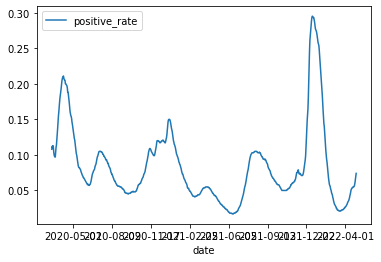

In [7]:
data2 = data[data['iso_code']=='USA']
data2.plot(x='date', y='positive_rate')

(3) create a pivot table and plot some data from that pivot table
- Firstly I cleaned the dataset
- Then I make a pivot table shows the number of hospital patients in each month time and in each continent

In [8]:
cleandata = []
for i in data['new_vaccinations']:
    if np.isnan(i):
        cleandata.append(0);
    else:
        cleandata.append(i);
data['new_vaccinations'] = cleandata

In [9]:
data3 = data.pivot_table(values='hosp_patients', index=['month'], columns=['continent'])
data3

continent,Africa,Asia,Europe,North America,Oceania,South America
month,,,,,,
2020-01,NaN,NaN,1.000000,NaN,NaN,NaN
2020-02,NaN,NaN,84.550000,NaN,NaN,NaN
2020-03,NaN,500.631579,1838.838407,120.478261,426.000000,NaN
2020-04,260.00,1031.131148,3859.447403,1963.400000,225.333333,NaN
2020-05,697.20,511.863636,2119.450000,2756.612903,44.838710,NaN
2020-06,2842.00,237.562500,1009.814077,1318.333333,17.333333,NaN
2020-07,6828.25,497.880597,719.966887,15824.291667,149.903226,NaN
2020-08,8659.80,854.606061,665.168734,19666.225806,603.838710,NaN
2020-09,5271.75,1054.169231,912.121019,13883.500000,163.100000,NaN


- Then I plot out the pivot table. Each line in the plot represents the data in each continent. And each line shows information about how the number of patients in hospital changes with time.

Text(0, 0.5, 'number')

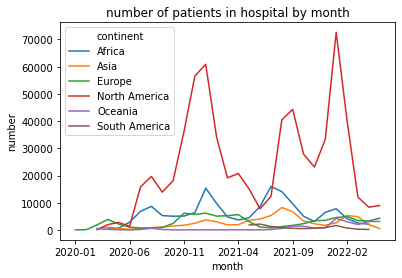

In [10]:
ax = data3.plot(title='number of patients in hospital by month')
ax.set_xlabel("month")
ax.set_ylabel("number")

(4) use the groupby feature to analyze
Here I analyze what the new vaccinations number all over the world in each month, and then use plot to show it.

<AxesSubplot:xlabel='month'>

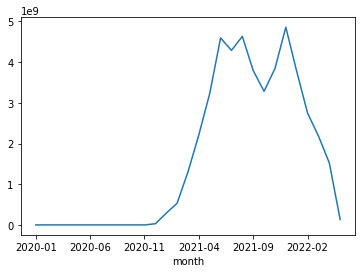

In [11]:
df4 = data.groupby(['month']).new_vaccinations.agg(sum)
df4.plot()

### e. create a discussion cell in which you discuss what your analysis tells you about the data

### My Question 1: 
What is the relationship between total vacination number per hundred person and new death number?
- As the plot shows, we may make the guess that a higher number of total vacination per hundred personis correlated with a lower new death number, especially when the total vacination number per hundred person is over 200, which means 2 doses of vaccine.

<AxesSubplot:xlabel='total_vaccinations_per_hundred', ylabel='new_deaths'>

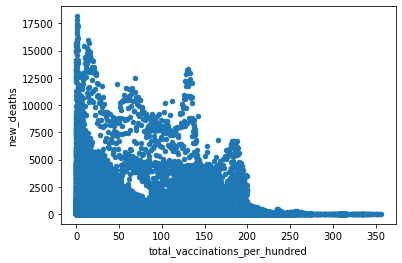

In [12]:
data.plot.scatter(x='total_vaccinations_per_hundred', y='new_deaths')

### My Question 2: 
Up till now, which month has the highest number of new cases for the whole world?
- we can use groupby and idxmax to find out the max number of new cases for the whole world occured in January 2022, which is also demonstrated using the plot below.

The month with max number of new cases is:  2022-01


<AxesSubplot:xlabel='month'>

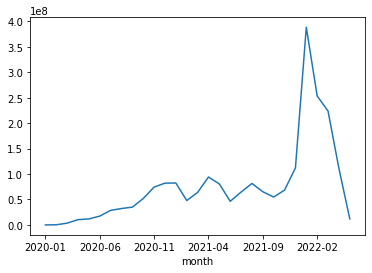

In [13]:
df4 = data.groupby(['month']).new_cases.agg(sum)
print('The month with max number of new cases is: ', df4.idxmax())
df4.plot()